About the Dataset

The following data is from this link: https://www.kaggle.com/datasets/uciml/iris?resource=download

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.


In [2]:
#import numpy
import pandas as pd

#import pandas
import numpy as np

In [3]:
#read the csv file in the page
iris = pd.read_csv('Project\Iris Flower Project\Iris.csv')

In [4]:
#first 10 numbers in the dataset
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
#iris column name
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Here we will go in depth of what each column means

Id = the unique identification each sepal is given

SepalLengthCm = is the length of the sepal (cm)

SepalWidthCm = is the width of the sepal (cm)

PetalLengthCm = is the length of the petal (cm)

PetalWidthCm = is the Width of the petal (cm)

Species = the species type for the specific flower

In [7]:
iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

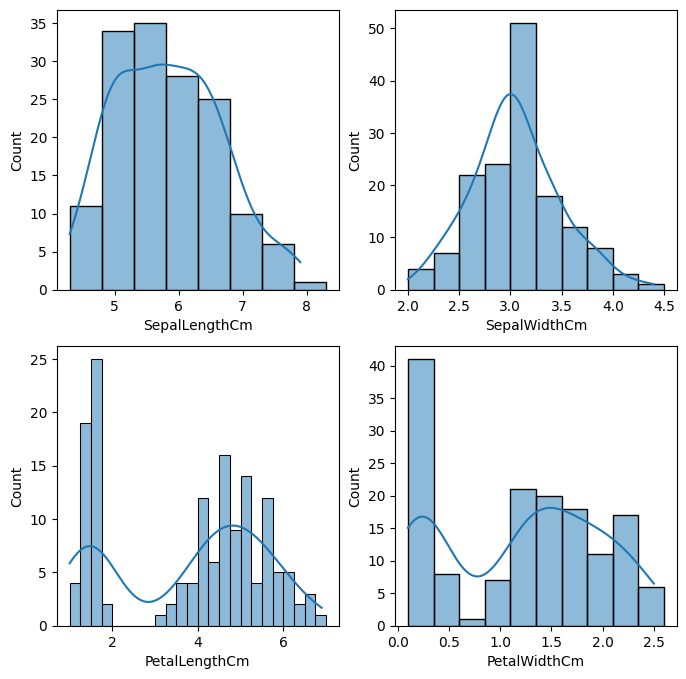

In [42]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize = (8,8))
sns.histplot(data = iris, x = "SepalLengthCm", binwidth=.50, kde = True, ax = axs[0,0])
sns.histplot(data = iris, x = "SepalWidthCm", binwidth=.25, kde = True, ax = axs[0,1])
sns.histplot(data = iris, x = "PetalLengthCm", binwidth=.25, kde = True, ax = axs[1,0])
sns.histplot(data = iris, x = "PetalWidthCm", binwidth=.25, kde = True, ax = axs[1,1])

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

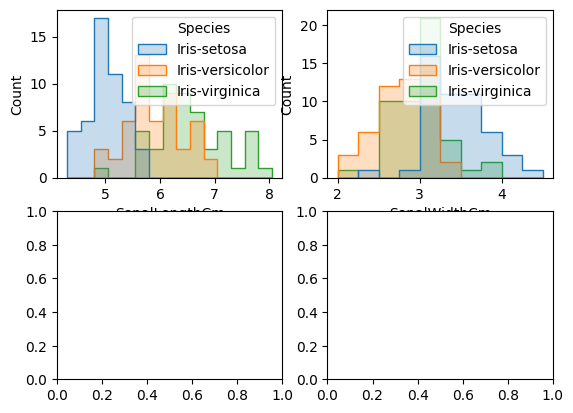

In [38]:
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.histplot(data = iris, x = "SepalLengthCm", binwidth=.25, hue = "Species", element = "step", ax = axs[0,0])
sns.histplot(data = iris, x = "SepalWidthCm", binwidth=.25, hue = "Species", element = "step", ax = axs[0,1])